In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()

In [2]:
df = pd.read_csv('credit_dataset.csv')
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [3]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,Unnamed: 0,int64,25134,0,"[0, 16763, 16761, 16760, 16759, 16758, 16757, ...",0
1,ID,int64,25134,0,"[5008806, 5100012, 5118239, 5118238, 5100011, ...",0
2,GENDER,object,2,0,"[F, M]",0
3,CAR,object,2,0,"[N, Y]",0
4,REALITY,object,2,0,"[Y, N]",0
5,NO_OF_CHILD,int64,9,0,"[0, 1, 2, 3, 4, 5, 14, 7, 19]",0
6,INCOME,float64,195,0,"[135000.0, 180000.0, 157500.0, 225000.0, 11250...",0
7,INCOME_TYPE,object,5,0,"[Working, Commercial associate, State servant,...",0
8,EDUCATION_TYPE,object,5,0,"[Secondary / secondary special, Higher educati...",0
9,FAMILY_TYPE,object,5,0,"[Married, Single / not married, Civil marriage...",0


In [4]:
df=df.drop(['Unnamed: 0','ID'],axis=1)

In [5]:
df.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [6]:
df['INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'State servant', 'Student',
       'Pensioner'], dtype=object)

Column 'GENDER' is not countinuous.
Column 'CAR' is not countinuous.
Column 'REALITY' is not countinuous.
Column 'INCOME_TYPE' is not countinuous.
Column 'EDUCATION_TYPE' is not countinuous.
Column 'FAMILY_TYPE' is not countinuous.
Column 'HOUSE_TYPE' is not countinuous.
Column 'FLAG_MOBIL' is not countinuous.
Column 'WORK_PHONE' is not countinuous.
Column 'PHONE' is not countinuous.
Column 'E_MAIL' is not countinuous.
Column 'TARGET' is not countinuous.


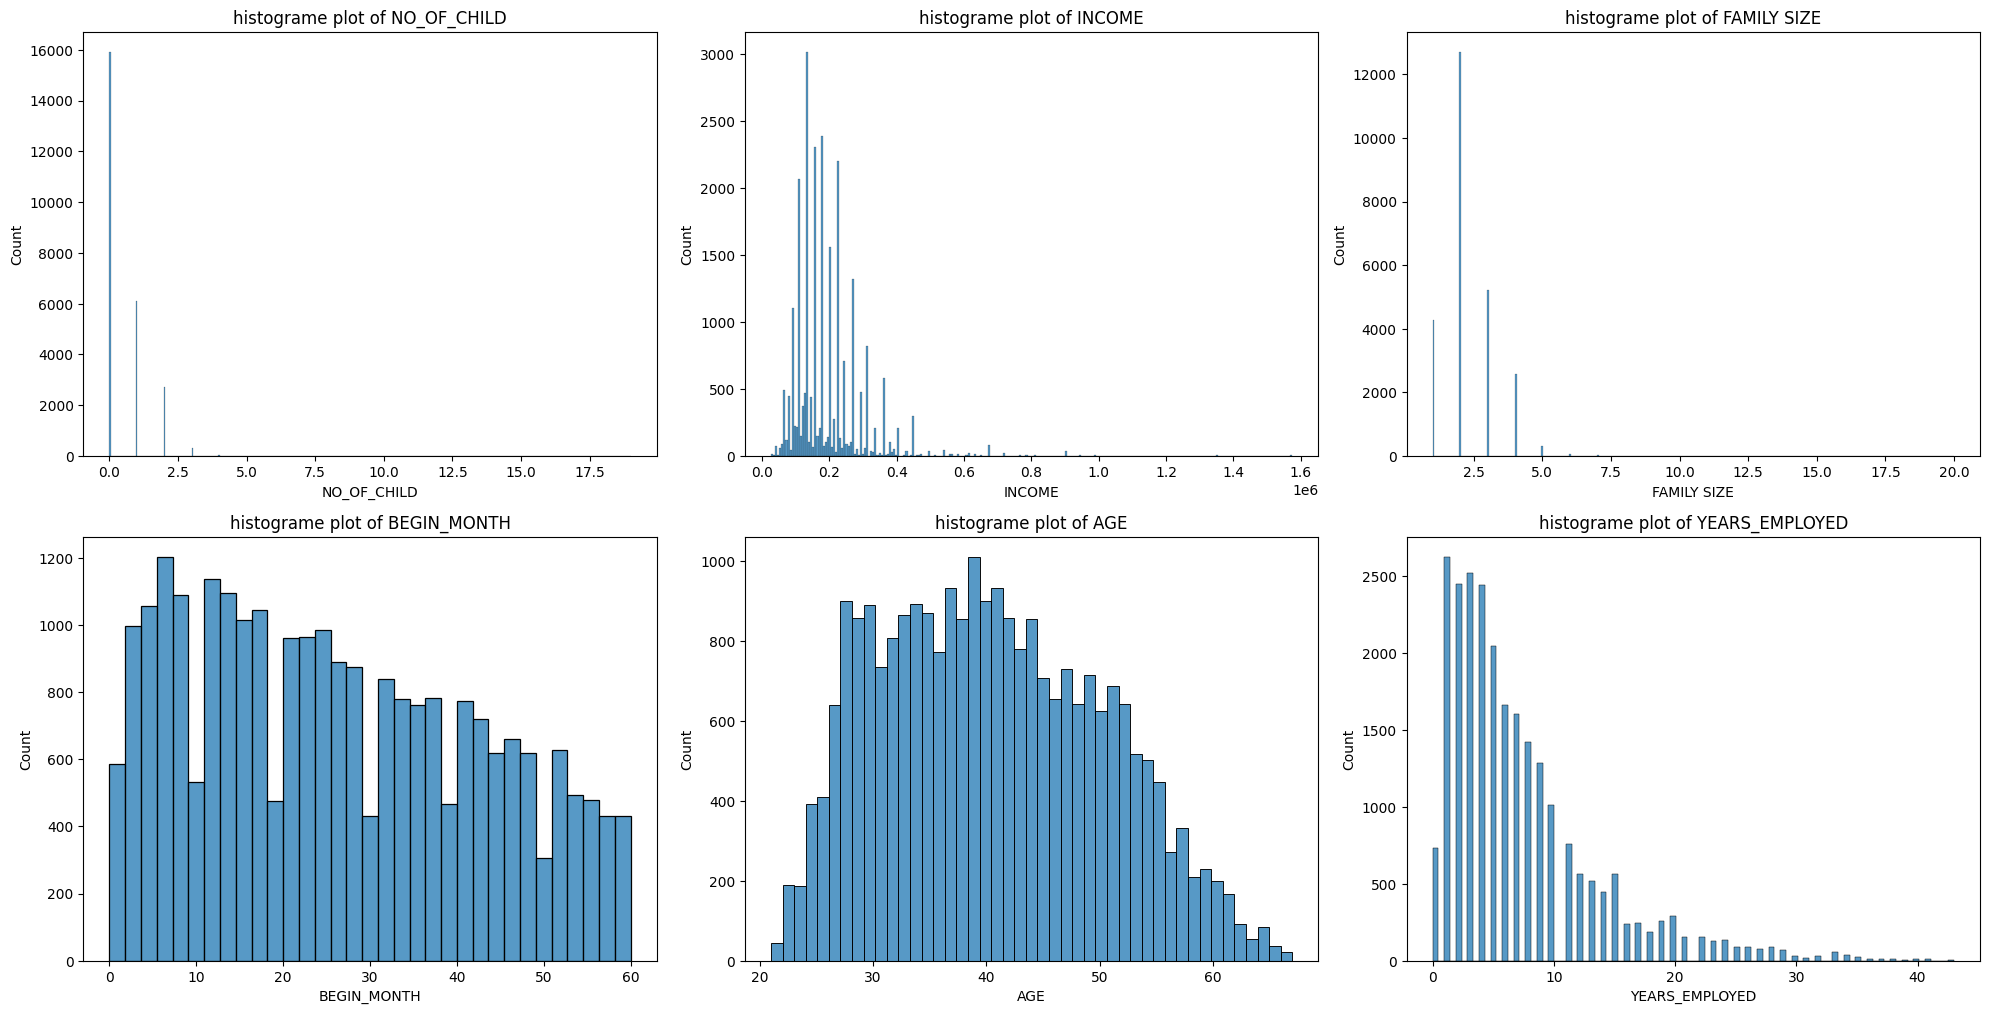

In [7]:
cleaner.continuous_plot(df,df.columns,6)

Column 'NO_OF_CHILD' is not categorical.
Column 'INCOME' is not categorical.
Column 'FAMILY SIZE' is not categorical.
Column 'BEGIN_MONTH' is not categorical.
Column 'AGE' is not categorical.
Column 'YEARS_EMPLOYED' is not categorical.


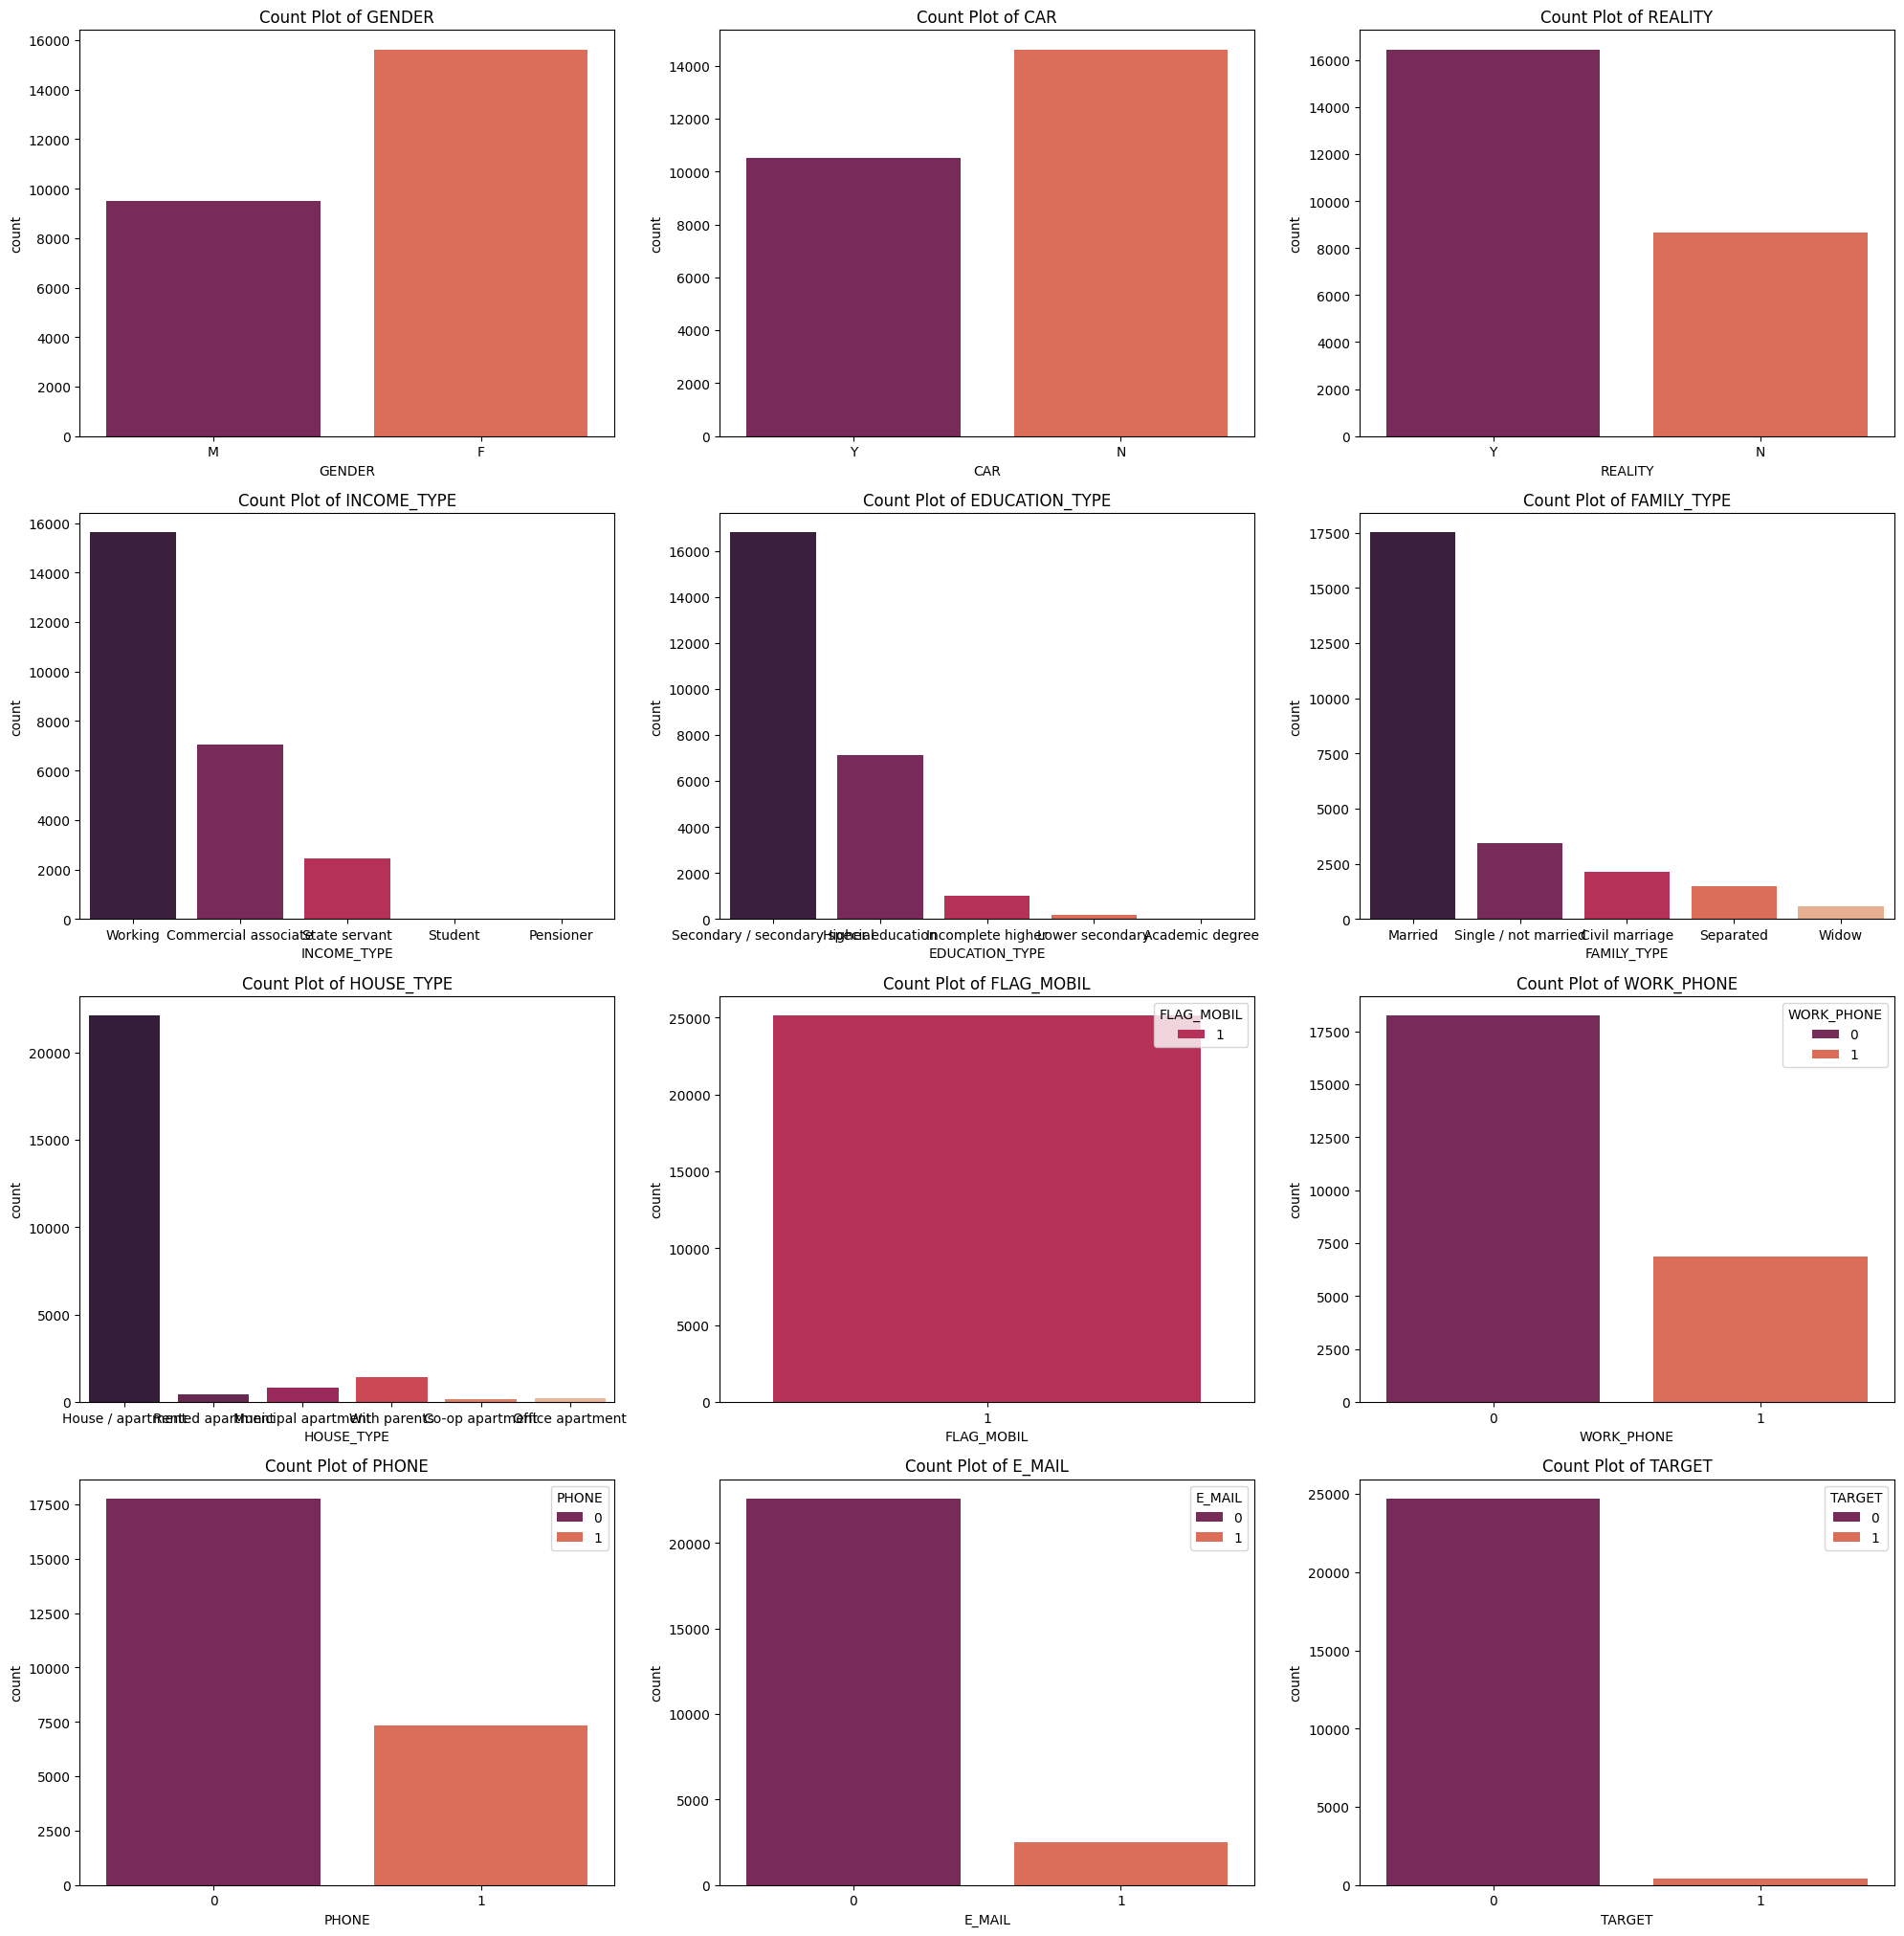

In [8]:
cleaner.categorical_plot(df,df.columns,6)

In [9]:
df=df.drop('FLAG_MOBIL',axis=1)

In [10]:
df.columns

Index(['GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME', 'INCOME_TYPE',
       'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE', 'WORK_PHONE', 'PHONE',
       'E_MAIL', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED',
       'TARGET'],
      dtype='object')

In [11]:
df['TARGET'].value_counts()

TARGET
0    24712
1      422
Name: count, dtype: int64

Data is imbalanced, should be solved by oversampling class 1 or undersampling class 0

In [12]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [13]:
x = df.drop("TARGET",axis=1)
y=df['TARGET']

In [14]:
y.value_counts()

TARGET
0    24712
1      422
Name: count, dtype: int64

In [15]:
x_dummies=pd.get_dummies(x,drop_first=True,dtype=int)

Random oversampling

In [16]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(x_dummies, y)

print('Resampled dataset shape:', Counter(y_res))

Resampled dataset shape: Counter({0: 24712, 1: 24712})


In [17]:
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [19]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [20]:
log.score(x_train,y_train)

0.6107640557424315

In [21]:
log.score(x_test,y_test)

0.6088012139605463

In [22]:
y_pred=log.predict(x_test)

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [24]:
print(class_report)

              precision    recall  f1-score   support

           0       0.61      0.59      0.60      4894
           1       0.61      0.63      0.62      4991

    accuracy                           0.61      9885
   macro avg       0.61      0.61      0.61      9885
weighted avg       0.61      0.61      0.61      9885



In [26]:
print(conf_matrix)

[[2884 2010]
 [1857 3134]]


SMOTE

In [27]:
smote = SMOTE(random_state=420)
X_res,y_res = smote.fit_resample(x_dummies,y)
print('Resampled dataset shape:', Counter(y_res))

Resampled dataset shape: Counter({0: 24712, 1: 24712})


In [28]:
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [29]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [30]:
log.score(x_train,y_train)

0.6443511469688156

In [31]:
log.score(x_test,y_test)

0.6418816388467374

In [32]:
y_pred=log.predict(x_test)

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [34]:
print(class_report)

              precision    recall  f1-score   support

           0       0.65      0.60      0.62      4894
           1       0.63      0.69      0.66      4991

    accuracy                           0.64      9885
   macro avg       0.64      0.64      0.64      9885
weighted avg       0.64      0.64      0.64      9885



In [35]:
print(conf_matrix)

[[2921 1973]
 [1567 3424]]


In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(x_dummies, y)

print('Resampled dataset shape:', Counter(y_res))

Resampled dataset shape: Counter({0: 422, 1: 422})


In [39]:
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [40]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [41]:
log.score(x_train,y_train)

0.6014814814814815

In [42]:
log.score(x_test,y_test)

0.591715976331361

In [43]:
y_pred=log.predict(x_test)

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [46]:
print(class_report)

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        84
           1       0.61      0.54      0.57        85

    accuracy                           0.59       169
   macro avg       0.59      0.59      0.59       169
weighted avg       0.59      0.59      0.59       169



In [53]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(x_dummies, y)

print('Resampled dataset shape:', Counter(y_res))

Resampled dataset shape: Counter({0: 24658, 1: 24658})


In [54]:
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [55]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [56]:
log.score(x_train,y_train)

0.7155530771570516

In [57]:
log.score(x_test,y_test)

0.7186739659367397

In [58]:
y_pred=log.predict(x_test)

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [60]:
print(class_report)

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      4949
           1       0.72      0.70      0.71      4915

    accuracy                           0.72      9864
   macro avg       0.72      0.72      0.72      9864
weighted avg       0.72      0.72      0.72      9864



In [61]:
print(conf_matrix)

[[3641 1308]
 [1467 3448]]


In [62]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [63]:
knn.score(x_train,y_train)

0.9319426138091859

In [64]:
knn.score(x_test,y_test)

0.9071370640713706

In [65]:
y_pred=knn.predict(x_test)

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [67]:
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      4949
           1       0.86      0.97      0.91      4915

    accuracy                           0.91      9864
   macro avg       0.91      0.91      0.91      9864
weighted avg       0.91      0.91      0.91      9864



In [68]:
print(conf_matrix)

[[4162  787]
 [ 129 4786]]


In [69]:
DTC = DecisionTreeClassifier(max_depth=5,random_state=42,max_features=3)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=3, random_state=42)

In [70]:
DTC.score(x_train,y_train)

0.7238669775930244

In [71]:
DTC.score(x_test,y_test)

0.7234387672343877

In [72]:
y_pred=DTC.predict(x_test)

In [73]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [74]:
print(conf_matrix)

[[3739 1210]
 [1518 3397]]


In [75]:
print(class_report)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      4949
           1       0.74      0.69      0.71      4915

    accuracy                           0.72      9864
   macro avg       0.72      0.72      0.72      9864
weighted avg       0.72      0.72      0.72      9864



In [76]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
rfc.score(x_train,y_train)

0.9991381932474906

In [78]:
rfc.score(x_test,y_test)

0.990977291159773

In [79]:
y_pred=rfc.predict(x_test)

In [80]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [81]:
print(conf_matrix)

[[4925   24]
 [  65 4850]]


In [82]:
print(class_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4949
           1       1.00      0.99      0.99      4915

    accuracy                           0.99      9864
   macro avg       0.99      0.99      0.99      9864
weighted avg       0.99      0.99      0.99      9864

